## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
value_counts = application_df['APPLICATION_TYPE'].value_counts()
value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 1000
application_types_to_replace = value_counts[value_counts < cutoff].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
calssification = application_df['CLASSIFICATION'].value_counts()
calssification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
calssification[calssification>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_cutoff = 500
classifications_to_replace = calssification[calssification< class_cutoff].index
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_df = pd.get_dummies(application_df)
application_df = application_df.merge(cat_df, left_index=True, right_index=True)
application_df = application_df.drop(columns= ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION',  'SPECIAL_CONSIDERATIONS','INCOME_AMT'])
application_df.head()

,STATUS_x,ASK_AMT_x,IS_SUCCESSFUL_x,STATUS_y,ASK_AMT_y,IS_SUCCESSFUL_y,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,5000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,1,108590,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,1,5000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,1,6692,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,1,142590,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = cat_df['IS_SUCCESSFUL'].values
X = cat_df.drop(columns=['IS_SUCCESSFUL'],axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
first_layer = tf.keras.layers.Dense(units=20, input_dim=len(X_train[0]), activation='relu')
nn.add(first_layer)
# Second hidden layer
second_layer = tf.keras.layers.Dense(units=10, activation='relu')
nn.add(second_layer)
# Output layer
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
nn.add(output_layer)
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                840       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_filepath = 'checkpoints/model_weights.{epoch:02d}.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    period=5,

)
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[checkpoint_callback], verbose=2)

Epoch 1/100
804/804 - 4s - loss: 0.5872 - accuracy: 0.7093 - 4s/epoch - 5ms/step
Epoch 2/100
804/804 - 4s - loss: 0.5620 - accuracy: 0.7266 - 4s/epoch - 5ms/step
Epoch 3/100
804/804 - 2s - loss: 0.5575 - accuracy: 0.7285 - 2s/epoch - 3ms/step
Epoch 4/100
804/804 - 3s - loss: 0.5550 - accuracy: 0.7280 - 3s/epoch - 4ms/step
Epoch 5/100
804/804 - 2s - loss: 0.5544 - accuracy: 0.7296 - 2s/epoch - 3ms/step
Epoch 6/100
804/804 - 2s - loss: 0.5534 - accuracy: 0.7292 - 2s/epoch - 3ms/step
Epoch 7/100
804/804 - 3s - loss: 0.5525 - accuracy: 0.7304 - 3s/epoch - 4ms/step
Epoch 8/100
804/804 - 2s - loss: 0.5515 - accuracy: 0.7305 - 2s/epoch - 3ms/step
Epoch 9/100
804/804 - 1s - loss: 0.5515 - accuracy: 0.7308 - 1s/epoch - 1ms/step
Epoch 10/100
804/804 - 1s - loss: 0.5502 - accuracy: 0.7324 - 1s/epoch - 1ms/step
Epoch 11/100
804/804 - 1s - loss: 0.5498 - accuracy: 0.7318 - 1s/epoch - 1ms/step
Epoch 12/100
804/804 - 1s - loss: 0.5500 - accuracy: 0.7320 - 1s/epoch - 1ms/step
Epoch 13/100
804/804 - 1s

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5549 - accuracy: 0.7318 - 470ms/epoch - 2ms/step
Loss: 0.5548706650733948, Accuracy: 0.7317784428596497


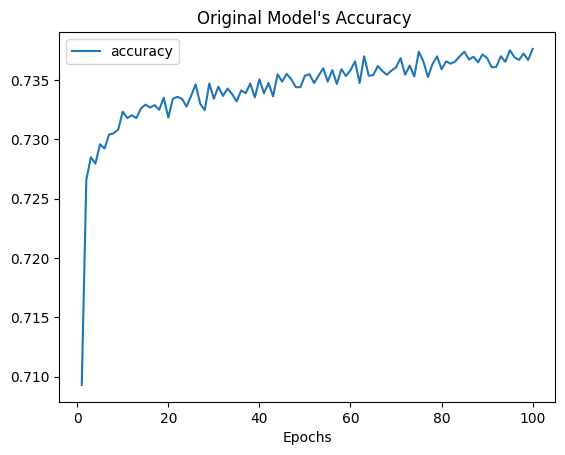

In [23]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1
accuracy_plot = history_df.plot(y='accuracy')
import matplotlib.pyplot as plt
plt.title("Original Model's Accuracy ")
plt.xlabel("Epochs")
plt.savefig("accuracy.png")

In [20]:
import matplotlib.pyplot as plt
plt.savefig("accuracy.png")

<Figure size 640x480 with 0 Axes>

In [21]:
# Export our model to HDF5 file
nn.save('../Models/AlphabetSoupCharity.h5')
